<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 3 //  </font></h1>

Input variables:
# bank client data:
- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
- 8 - contact: contact communication type (categorical: 'cellular','telephone')
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
- 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means -  client was not previously contacted)
- 14 - previous: number of contacts performed before this campaign and for this client (numeric)
- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
- 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
- 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
- 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
- 20 - nr.employed: number of employees - quarterly indicator (numeric)

# output variable (desired target):
- 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Data Preparation

In [1]:
!pip install pandas_profiling

In [2]:
!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
# Read the data
bankfull=pd.read_csv('Assg3/bank-full.csv',sep=';')
bankaddfull=pd.read_csv('Assg3/bank-additional-full.csv',sep=';')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [5]:
bankaddfull.shape

(41188, 21)

In [6]:
bankaddfull['y']=bankaddfull['y'].astype('category').cat.codes

In [7]:
report=bankaddfull.profile_report(title='Bank Client Data',
                          progress_bar=False)
report

Kesimpulan terkait data:
- Berdasarkan matriks korelasi, sejumlah faktor yang berkorelasi tinggi dengan client subscription adalah social and economic context attributes serta informasi terkait campaign yang pernah diinformasikan. Sedangkan client info yang berpengaruh adalah 'age' dan 'job'.
- Data duplikat tidak dapat dipastikan merupakan data yang sama karena tidak terdapat kolom yg bersifat unik untuk digunakan sebagai identifier. Data duplikat tetap digunakan.
- Tidak terdapat missing data
- Meski 'duration' tidak menunjukkan korelasi dengan target, namun kolom tetap perlu di-drop karena informasi tidak trsedia sebelum call dilakukan.
- kolom 'month' memiliki korelasi yang tinggi dengan 'social and economic context attributes' sebaiknya di-drop karena dikhawatirkan dapat menyebabkan autokorelasi. Korelasi yang tinggi antara 'month' dan target sangat dimungkinkan karena kondisi social economic yang ada. 

In [8]:
bankaddfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
# ubah sejumlah kolom menjadi kategori 

bankaddfull['job']=bankaddfull['job'].astype('category')
bankaddfull['marital']=bankaddfull['marital'].astype('category')
bankaddfull['education']=bankaddfull['education'].astype('category')
bankaddfull['default']=bankaddfull['default'].astype('category')
bankaddfull['housing']=bankaddfull['housing'].astype('category')
bankaddfull['loan']=bankaddfull['loan'].astype('category')
bankaddfull['month']=bankaddfull['month'].astype('category')
bankaddfull['day_of_week']=bankaddfull['day_of_week'].astype('category')
bankaddfull['contact']=bankaddfull['contact'].astype('category')
bankaddfull['poutcome']=bankaddfull['poutcome'].astype('category')


In [10]:
# hapus kolom yang tidak akan digunakan 'duration' sesuai deskripsi tabel
bankaddfull=bankaddfull.drop(columns=['duration'])

In [11]:
print("bank-additional-full shape:",bankaddfull.shape)
bankaddfull.head()


bank-additional-full shape: (41188, 20)


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0

In [12]:
bankaddfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  campaign        41188 non-null  int64   
 11  pdays           41188 non-null  int64   
 12  previous        41188 non-null  int64   
 13  poutcome        41188 non-null  category
 14  emp.var.rate    41188 non-null  float64 
 15  cons.price.idx  41188 non-null  float64 
 16  cons.conf.idx   41188 non-null  float64 
 17  euribor3m   

Seluruh data telah diubah menjadi integer dan kategori untuk bisa dilanjutkan ke proses pemodelan.

In [13]:
print("Job:",bankaddfull['job'].unique())
print("Marital:",bankaddfull['marital'].unique())
print("Education:",bankaddfull['education'].unique())
print("Default:",bankaddfull['default'].unique())
print("Housing:",bankaddfull['housing'].unique())
print("Loan:",bankaddfull['loan'].unique())
print("Month:",bankaddfull['month'].unique())
print("target:",bankaddfull['y'].unique())
print("Previous outcome:",bankaddfull['poutcome'].unique())
print("Days:",bankaddfull['day_of_week'].unique())

Job: ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', ..., 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
Length: 12
Categories (12, object): ['housemaid', 'services', 'admin.', 'blue-collar', ..., 'self-employed', 'unknown', 'entrepreneur', 'student']
Marital: ['married', 'single', 'divorced', 'unknown']
Categories (4, object): ['married', 'single', 'divorced', 'unknown']
Education: ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
Categories (8, object): ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
Default: ['no', 'unknown', 'yes']
Categories (3, object): ['no', 'unknown', 'yes']
Housing: ['no', 'yes', 'unknown']
Categories (3, object): ['no', 'yes', 'unknown']
Loan: ['no', 'yes', 'unknown']
Categories (3, object): ['no', 'yes', 'unknown']
Month: ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar',

In [14]:
#mapping category

maritalmap={'married':3, 'single':2, 'divorced':1, 'unknown':0}
educationmap={'basic.4y':2, 'high.school':5, 'basic.6y':3, 'basic.9y':4, 'professional.course':6, 'unknown':0, 'university.degree':7, 'illiterate':1}
defaultmap={'no':0, 'unknown':1, 'yes':2}
housingmap={'no':0, 'unknown':1, 'yes':2}
loanmap={'no':0, 'unknown':1, 'yes':2}
monthmap={'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'mar':3, 'apr':4, 'sep':9}
poutcomemap={'nonexistent':1, 'failure':0, 'success':2}
daymap={'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}

In [15]:
# replace category dengan category code  
bankaddfull['jobcode']=bankaddfull['job'].astype('category').cat.codes
bankaddfull['contactcode']=bankaddfull['contact'].astype('category').cat.codes
bankaddfull=bankaddfull.replace({"marital": maritalmap, 'education':educationmap,'default':defaultmap,
                     'housing':housingmap,'loan':loanmap,'month':monthmap,'poutcome':poutcomemap,'day_of_week':daymap})
bankaddfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  int64   
 3   education       41188 non-null  int64   
 4   default         41188 non-null  int64   
 5   housing         41188 non-null  int64   
 6   loan            41188 non-null  int64   
 7   contact         41188 non-null  category
 8   month           41188 non-null  int64   
 9   day_of_week     41188 non-null  int64   
 10  campaign        41188 non-null  int64   
 11  pdays           41188 non-null  int64   
 12  previous        41188 non-null  int64   
 13  poutcome        41188 non-null  int64   
 14  emp.var.rate    41188 non-null  float64 
 15  cons.price.idx  41188 non-null  float64 
 16  cons.conf.idx   41188 non-null  float64 
 17  euribor3m   

In [16]:
bankaddfull.groupby(['y']).agg({'y': ['count']})

y
   count
y       
0  36548
1   4640

In [17]:
# split data menjadi data test dan train
from sklearn.model_selection import train_test_split

x=bankaddfull[['age','jobcode','contactcode','month','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
y=bankaddfull['y']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [18]:
# split data menjadi data test dan train
from sklearn.model_selection import train_test_split

x=bankaddfull[['age','contactcode','pdays','previous','poutcome','euribor3m']]
y=bankaddfull['y']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

## Model 1: Decision Tree

In [19]:
pd.DataFrame(y_test).groupby(['y'])['y'].count()

y
0    10944
1     1413
Name: y, dtype: int64

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
clf=DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
aDT=accuracy_score(y_pred,y_test)
mDT=confusion_matrix(y_pred,y_test)
print('Accuracy Decision Tree:',accuracy_score(y_test,y_pred))
print('Confusion Matrix:', confusion_matrix(y_pred,y_test))

Accuracy Decision Tree: 0.896495913247552
Confusion Matrix: [[10843  1178]
 [  101   235]]


In [21]:
# tampilkan tree dengan category asli!!

## Model 2: KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
aKN=accuracy_score(y_pred,y_test)
mKN=confusion_matrix(y_pred,y_test)
print('Accuracy K-Nearest Neighbor:', accuracy_score(y_pred,y_test))
print('Confusion Matrix:', confusion_matrix(y_pred,y_test))

Accuracy K-Nearest Neighbor: 0.8837905640527636
Confusion Matrix: [[10543  1035]
 [  401   378]]


## Model 3: SVM 

In [23]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
svmodel=svm.SVC()
svmodel.fit(x_train,y_train)
y_pred=svmodel.predict(x_test)
aSV=accuracy_score(y_pred,y_test)
mSV=confusion_matrix(y_pred,y_test)
print('Accuracy Support Vector Machine (SVM):', accuracy_score(y_pred,y_test))
print('Confusion Matrix:', confusion_matrix(y_pred,y_test))

Accuracy Support Vector Machine (SVM): 0.895039249008659
Confusion Matrix: [[10770  1123]
 [  174   290]]


## Model 4: Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
aNB=accuracy_score(y_pred,y_test)
mNB=confusion_matrix(y_pred,y_test)
print('Accuracy Support Naive Bayes:', accuracy_score(y_pred,y_test))
print('Confusion Matrix:', confusion_matrix(y_pred,y_test))

Accuracy Support Naive Bayes: 0.8430039653637614
Confusion Matrix: [[9969  965]
 [ 975  448]]


## Model 5: Random Forest 

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
aRF=accuracy_score(y_pred,y_test)
mRF=confusion_matrix(y_pred,y_test)
print('Accuracy Random Forest:', accuracy_score(y_pred,y_test))
print('Confusion Matrix:', confusion_matrix(y_pred,y_test))

Accuracy Random Forest: 0.8873512988589464
Confusion Matrix: [[10548   996]
 [  396   417]]


## Model 6: Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
LS=LogisticRegression()
LS.fit(x_train,y_train)
y_pred=LS.predict(x_test)
aLS=accuracy_score(y_pred,y_test)
mLS=confusion_matrix(y_pred,y_test)
print('Accuracy Logistic Regression:', accuracy_score(y_pred,y_test))
print('Confusion Matrix:', confusion_matrix(y_pred,y_test))

Accuracy Logistic Regression: 0.896091284292304
Confusion Matrix: [[10793  1133]
 [  151   280]]


## Visualized model result using plot

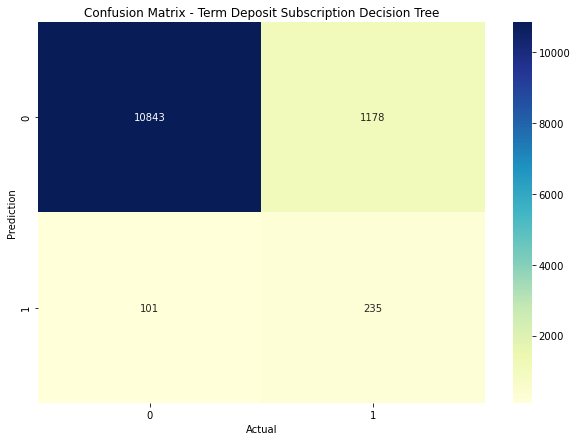

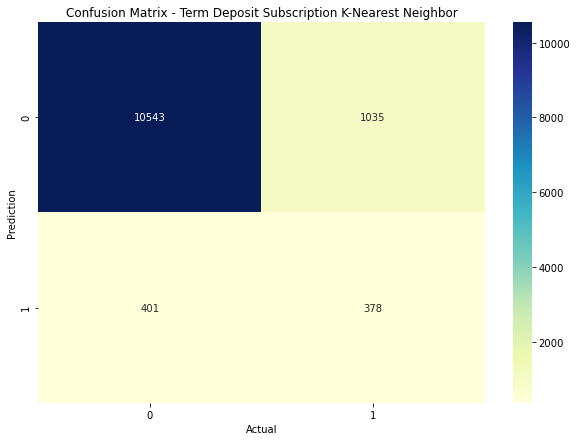

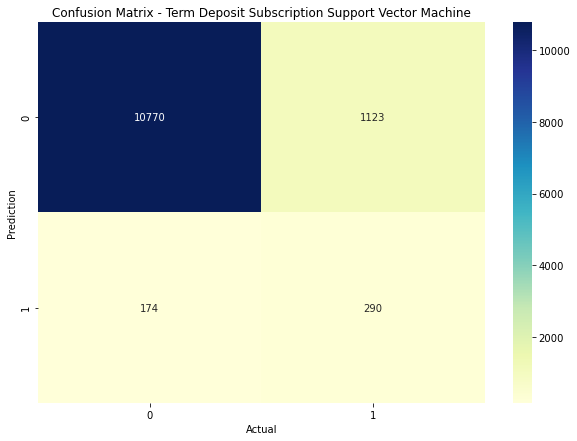

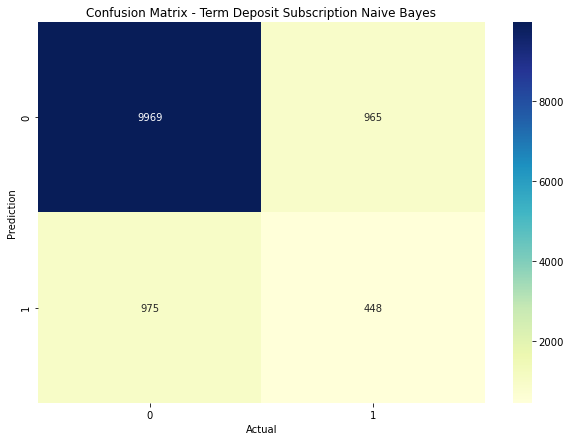

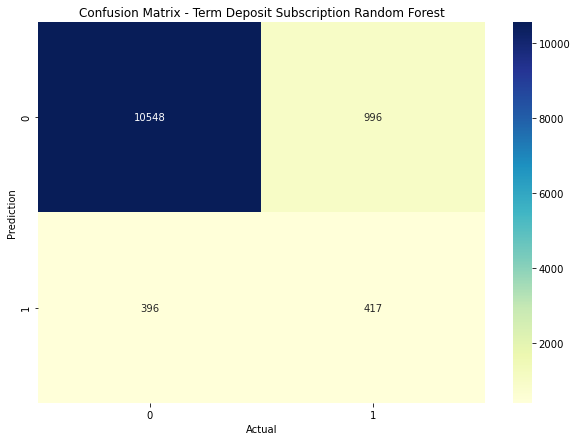

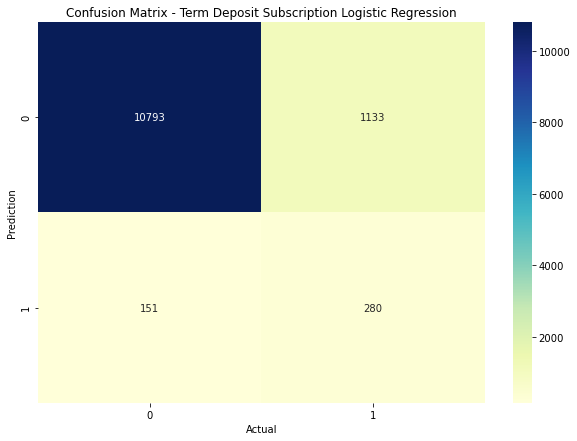

In [27]:
def ConfMatrix(matriks, model):
    
    plt.figure(figsize=(10,7))
    ax = sns.heatmap(matriks, annot=True, fmt="d",cmap="YlGnBu")

    ax.set_xlabel('Actual');ax.set_ylabel('Prediction'); 
    ax.set_title('Confusion Matrix - Term Deposit Subscription '+ model); 
    #ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

ConfMatrix(mDT,'Decision Tree')
ConfMatrix(mKN,'K-Nearest Neighbor')
ConfMatrix(mSV,'Support Vector Machine')
ConfMatrix(mNB,'Naive Bayes')
ConfMatrix(mRF,'Random Forest')
ConfMatrix(mLS,'Logistic Regression')


In [28]:
aDT

0.896495913247552

In [29]:
acc = [aDT, aKN, aSV, aNB, aRF, aLS]
method = np.array(['Decision Tree', 'K-Nearest Neighbor', 'Support Vector Machine', 'Naive Bayes', 'Random Forest','Logistic Regression'])

Accuracy= pd.DataFrame(acc,index =['Decision Tree', 'K-Nearest Neighbor', 'Support Vector Machine', 'Naive Bayes', 'Random Forest','Logistic Regression'],
                                              columns =['Accuracy Ratio'])




In [30]:
TP=np.array([mDT[1][1], mKN[1][1], mSV[1][1], mNB[1][1], mRF[1][1], mLS[1][1]]) #predicted as positive, and actual positive
FN=np.array([mDT[0][1], mKN[0][1], mSV[0][1], mNB[0][1], mRF[0][1], mLS[0][1]]) #predicted as negative, BUT actual positive
FP=np.array([mDT[1][0], mKN[1][0], mSV[1][0], mNB[1][0], mRF[1][0], mLS[1][0]]) #predicted as positive, BUT actual negative
TN=np.array([mDT[0][0], mKN[0][0], mSV[0][0], mNB[0][0], mRF[0][0], mLS[0][0]]) #predicted as negative, and actual negative
Accuracy['TP']=TP
Accuracy['FP']=FP
Accuracy['TN']=TN
Accuracy['FN']=FN

Accuracy['TP Rate']=Accuracy['TP']/(Accuracy['TP']+Accuracy['FN'])  #peluang client yang ditelepon melakukan subscribe 
Accuracy['Positive Predictive']=Accuracy['TP']/(Accuracy['TP']+Accuracy['FP']) #presisi dalam menebak client yang akan melakukan subscribe 
Accuracy.reset_index(level=0, inplace=True)
Accuracy

index  Accuracy Ratio   TP   FP     TN    FN   TP Rate  \
0           Decision Tree        0.896496  235  101  10843  1178  0.166313   
1      K-Nearest Neighbor        0.883791  378  401  10543  1035  0.267516   
2  Support Vector Machine        0.895039  290  174  10770  1123  0.205237   
3             Naive Bayes        0.843004  448  975   9969   965  0.317056   
4           Random Forest        0.887351  417  396  10548   996  0.295117   
5     Logistic Regression        0.896091  280  151  10793  1133  0.198160   

   Positive Predictive  
0             0.699405  
1             0.485237  
2             0.625000  
3             0.314828  
4             0.512915  
5             0.649652

Text(0.5, 1.0, 'Accuracy Ratio of Time Deposit Subscription Model')

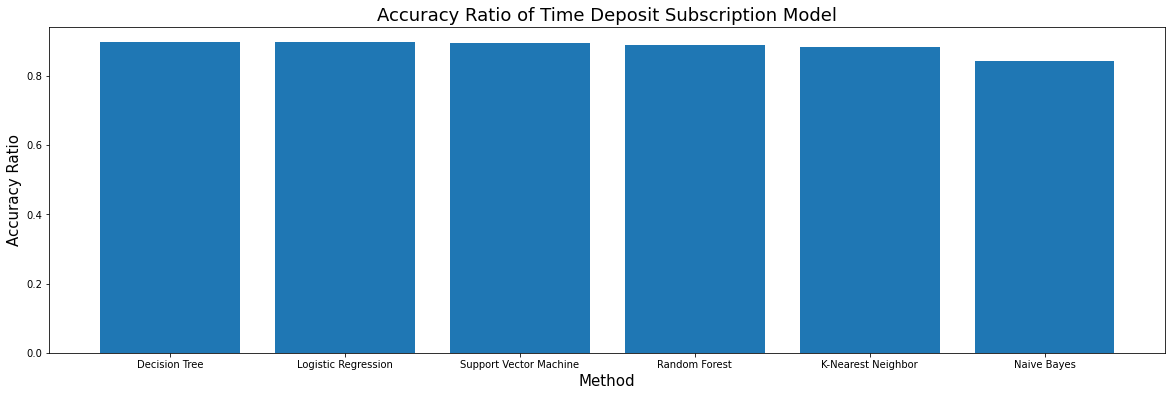

In [31]:
plt.figure(figsize=(20,6))
# bar plot with matplotlib
plt.bar('index','Accuracy Ratio',data=Accuracy.sort_values(by='Accuracy Ratio',ascending=False))

plt.xlabel("Method", size=15)
plt.ylabel("Accuracy Ratio", size=15)
plt.title("Accuracy Ratio of Time Deposit Subscription Model", size=18)
#plt.savefig("bar_plot_matplotlib_ascending_order_Python.png")

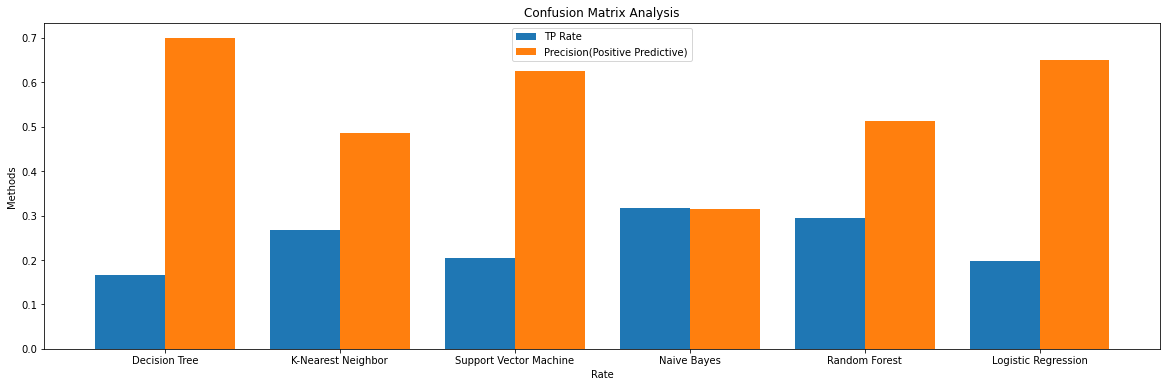

In [34]:
plt.figure(figsize=(20,6))
# bar plot with matplotlib

X = Accuracy['index']
TPRate=Accuracy['TP Rate']
Precision=Accuracy['Positive Predictive']
  
X_axis = np.arange(len(X))

plt.bar(X_axis-0.2 , TPRate, 0.4, label = 'TP Rate')
plt.bar(X_axis+0.2 , Precision, 0.4, label = 'Precision(Positive Predictive)')

plt.xticks(X_axis, X)
plt.xlabel("Rate")
plt.ylabel("Methods")
plt.title("Confusion Matrix Analysis")
plt.legend()
plt.show()

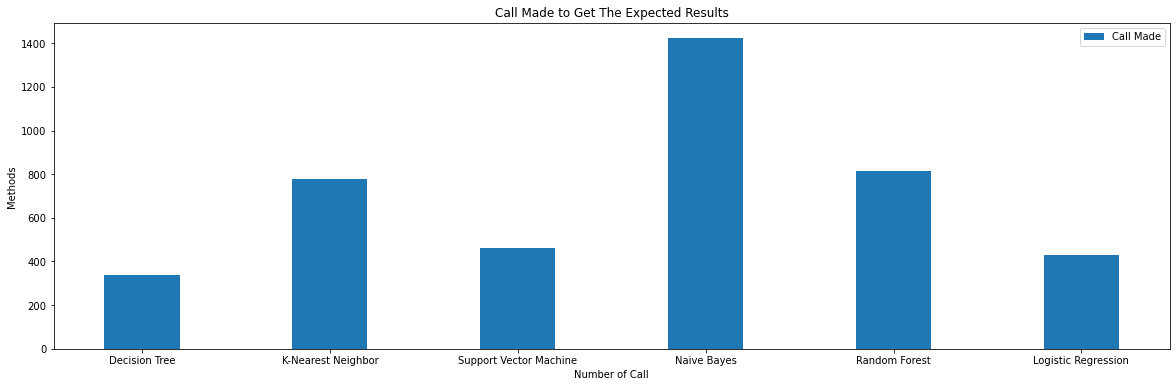

In [35]:
plt.figure(figsize=(20,6))
# bar plot with matplotlib

X = Accuracy['index']
CallMade=Accuracy['TP']+Accuracy['FP']
  
X_axis = np.arange(len(X))

plt.bar(X_axis , CallMade, 0.4, label = 'Call Made')


plt.xticks(X_axis, X)
plt.xlabel("Number of Call")
plt.ylabel("Methods")
plt.title("Call Made to Get The Expected Results")
plt.legend()
plt.show()


## Kesimpulan

Pemilihan model tergantung pada tujuan dan resource yang dapat dialokasikan oleh bank serta target time deposit yang diperlukan.
- Accuracy yang dihasilkan oleh setiap model hampir sama (0.84 - 0.89) dengan model Decision Tree menghasilkna Accuracy Ratio (AR) terbaik.
- Untuk bisa memperoleh subscription terbanyak sebesar 31,71% dari total client yang pernah melakukan subscribe, maka dapat digunakan model Naive Bayes. Namun demikian, model ini memiliki presisi 31,48% sehingga untuk bisa mendapatkan 1 subscribe diperlukan 3 call. Dalam hal ini, berdasarkan data test dibutuhkan 1423 call untuk mendapatkan 448 subscribe.
- Apabila bank memiliki keterbatasan resource untuk melakukan call, maka model SVM dan Logistic Regression dengan presisi mencapai >60% dan True Positive Rate mencapai kisaran 20%. Bank hanya perlu melakukan sekitar 450 call untuk memperoleh hampir 300 subscribe.